<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [54]:
import pandas as pd
import psycopg2
import warnings
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")



In [ ]:
DBNAME = '*********'
USER = '*********'
PASSWORD = '*********'
HOST = '*********'
PORT = '*********'

In [56]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [57]:
# SQL-запрос для подсчёта общего количества вакансий в таблице 
query_3_1 = f'''
    SELECT count(*)
    FROM VACANCIES
'''

In [58]:
# Выполняем SQL-запрос и извлекаем результат
try:
    result_df = pd.read_sql_query(query_3_1, connection)
    
    # Проверяем, что результат не пустой
    if not result_df.empty:
        # Получаем первое (и единственное) значение из результата запроса
        total_vacancies = int(result_df.iloc[0, 0])
        # Выводим результат с подписью
        display(f'Вакансий в базе: {total_vacancies}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Вакансий в базе: 49197'

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [59]:
# SQL-запрос для подсчёта общего количества работодателей в таблице 
query_3_2 = f'''
    SELECT COUNT(*) AS total_employers
    FROM EMPLOYERS
'''

In [60]:
# Выполняем SQL-запрос и извлекаем результат
try:
    result_df = pd.read_sql_query(query_3_2, connection)
    
    # Проверяем, что результат не пустой
    if not result_df.empty:
        # Получаем первое (и единственное) значение из результата запроса
        total_employers = int(result_df.iloc[0, 0])
        # Выводим результат с подписью
        display(f'Работодателей в базе: {total_employers}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Работодателей в базе: 23501'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [61]:
# SQL-запрос для подсчёта общего количества регионов в таблице 
query_3_3 = f'''
    SELECT COUNT(*)
    FROM AREAS
'''


In [62]:
# Выполняем SQL-запрос и извлекаем результат
try:
    result_df = pd.read_sql_query(query_3_3, connection)
    
    # Проверяем, что результат не пустой
    if not result_df.empty:
        # Получаем первое (и единственное) значение из результата запроса
        total_areas = int(result_df.iloc[0, 0])  # Или через алиас: result_df['total_areas'].iloc[0]
        # Выводим результат с подписью
        display(f'Регионов в базе: {total_areas}')
    else:
        print("Ошибка: Таблица AREAS пуста или не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Регионов в базе: 1362'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [63]:
# SQL-запрос для подсчёта общего количества отраслей в таблице 
query_3_4 = f'''
    SELECT COUNT(*)
    FROM INDUSTRIES
'''

In [64]:
try:
    result_df = pd.read_sql_query(query_3_4, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        total_industries = int(result_df.iloc[0, 0])  # Или через алиас: result_df['total_industries'].iloc[0]
        display(f'Отраслей в базе: {total_industries}')
    else:
        print("Ошибка: Таблица INDUSTRIES пуста или не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Отраслей в базе: 294'

***

## 📁 Аналитика базы данных

### 📌 Основные показатели:
| Категория              | Количество записей | Примечание |
|------------------------|--------------------|--------|
| **Вакансии**💼           | 49 197             |      |
| **Работодатели**🏢       | 23 501             |      |
| **Географические регионы**🌍 | 1 362          |      |
| **Индустрии**🧩          | 294                |      |

---

### ✅ Статус подключения:
- **Соединение с БД:** Установлено  
- **Доступ к данным:** Подтверждено  
- **Готовность к анализу:** ✅  

> *Данные актуальны на момент последнего обновления. Для углублённого анализа рекомендуется использовать агрегированные запросы и визуализацию.*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [65]:
# SQL-запрос для получения ТОП-5 регионов с наибольшим количеством вакансий 
# Используется LIMIT 5 для оптимизации производительности и соответствия требованиям тестирования
query_4_1 = f'''
    SELECT 
        a.name AS region_name,          -- Название региона
        COUNT(v.id) AS total_vacancies  -- Количество вакансий в регионе
    FROM AREAS a
    JOIN VACANCIES v ON a.id = v.area_id  -- Связь таблицы регионов с вакансиями
    GROUP BY a.id, a.name                -- Группировка по региону
    ORDER BY total_vacancies DESC        -- Сортировка по убыванию количества вакансий
    LIMIT 5                              -- Ограничение на ТОП-5
'''

In [66]:
try:
    result_df = pd.read_sql_query(query_4_1, connection)
    if not result_df.empty:
        print("ТОП-5 регионов по количеству вакансий:")
        display(result_df)
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

ТОП-5 регионов по количеству вакансий:


,region_name,total_vacancies
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [67]:
# SQL-запрос для подсчёта количества вакансий с указанием зарплаты
# Учитываются вакансии, где хотя бы одно из полей (salary_from или salary_to) заполнено
query_4_2 = f'''
    SELECT 
        COUNT(*) AS total_salary_vacancies  -- Количество вакансий с указанием зарплаты
    FROM VACANCIES v
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL  -- Фильтр по наличию данных о зарплате
'''

In [68]:
try:
    result_df = pd.read_sql_query(query_4_2, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        total_vacancies = int(result_df['total_salary_vacancies'].iloc[0])
        display(f'Вакансий с указанием зарплаты: {total_vacancies}')
    else:
        print("Ошибка: Результат запроса пустой или таблица VACANCIES не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Вакансий с указанием зарплаты: 24073'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [69]:
# SQL-запрос для вычисления средних значений зарплат по вакансиям 
# Рассчитываются округлённые средние значения по полям "salary_from" и "salary_to"
query_4_3 = f'''
    SELECT 
        ROUND(AVG(salary_from)) AS avg_salary_from,  -- Средняя минимальная зарплата
        ROUND(AVG(salary_to)) AS avg_salary_to       -- Средняя максимальная зарплата
    FROM VACANCIES
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL  -- Только вакансии с указанием зарплаты
'''

In [70]:
try:
    result_df = pd.read_sql_query(query_4_3, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        avg_from = int(result_df['avg_salary_from'].iloc[0])
        avg_to = int(result_df['avg_salary_to'].iloc[0])
        display(f'Средняя минимальная зарплата: {avg_from} ₽')
        display(f'Средняя максимальная зарплата: {avg_to} ₽')
    else:
        print("Ошибка: Результат запроса пустой или таблица VACANCIES не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Средняя минимальная зарплата: 71065 ₽'

'Средняя максимальная зарплата: 110537 ₽'

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [71]:
# SQL-запрос для получения пары "график + занятость" с наибольшим количеством вакансий на втором месте 
# OFFSET 1 + LIMIT 1 возвращает **вторую** запись из отсортированного списка (для тестирования)
# Для полного списка уберите блок OFFSET ... LIMIT ...
query_4_4 = f'''
    SELECT 
        schedule AS work_schedule,          -- График работы
        employment AS employment_type,      -- Тип занятости
        COUNT(*) AS total_vacancies         -- Количество вакансий
    FROM VACANCIES v
    GROUP BY 1, 2 
    ORDER BY total_vacancies DESC           -- Сортировка по убыванию количества вакансий
    OFFSET 1                                -- Пропуск первой строки (максимальное значение)
    LIMIT 1                                 -- Получение только второй строки
'''

In [72]:
try:
    result_df = pd.read_sql_query(query_4_4, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        schedule = result_df['work_schedule'].iloc[0]
        employment = result_df['employment_type'].iloc[0]
        count = int(result_df['total_vacancies'].iloc[0])
        display(f'На втором месте: "{schedule} + {employment}" с {count} вакансиями')
    else:
        print("Ошибка: Результат запроса пустой или таблица VACANCIES не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'На втором месте: "Удаленная работа + Полная занятость" с 7802 вакансиями'

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [73]:
# SQL-запрос для анализа распределения вакансий по требуемому опыту 
# Группировка по уровню опыта с подсчётом количества вакансий, сортировка по возрастанию
query_4_5 = f'''
    SELECT 
        experience AS required_experience,  -- Уровень требуемого опыта
        COUNT(*) AS total_vacancies         -- Количество вакансий
    FROM VACANCIES
    GROUP BY required_experience            -- Группировка по опыту
    ORDER BY total_vacancies ASC            -- Сортировка по возрастанию числа вакансий
'''

In [74]:
try:
    result_df = pd.read_sql_query(query_4_5, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        print("Распределение вакансий по уровню требуемого опыта:")
        display(result_df)
    else:
        print("Ошибка: Результат запроса пустой или таблица VACANCIES не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

Распределение вакансий по уровню требуемого опыта:


,required_experience,total_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Вывод:
Логично, в ходе расчетов выяснилось, что самое большое количество вакансий в самых больших городах. Мы также выяснили средние значения верхней границы зарплатных вилок, из разница составляет 35%, однако для более детального анализа хотелось бы оценить медианное значения, а также выделить самые крупные города, т.к. возможно предположить, что их влияние на расчет может искажать данные

Удалось выяснить, что самая востребованный вид работы - это удаленный при полной занятости, а также требования к стажу самые высокие - минимум 1 го

Также есть вакансии для людей без опыта

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [75]:
# SQL-запрос для получения ТОП-5 работодателей по количеству вакансий 
# Используется JOIN для связи таблиц VACANCIES и EMPLOYERS, сортировка по убыванию количества вакансий
# Для тестирования возвращаются первые 5 записей
query_5_1 = f'''
    SELECT 
        e.name AS employer_name,          -- Название работодателя
        COUNT(v.id) AS total_vacancies    -- Количество вакансий у работодателя
    FROM VACANCIES v
    INNER JOIN EMPLOYERS e ON v.employer_id = e.id  -- Связь таблицы вакансий с работодателями
    GROUP BY e.name                        -- Группировка по названию работодателя
    ORDER BY total_vacancies DESC          -- Сортировка по убыванию количества вакансий
    LIMIT 5                                -- Ограничение на ТОП-5
'''

In [76]:
try:
    result_df = pd.read_sql_query(query_5_1, connection)
    if not result_df.empty:
        print("ТОП-5 работодателей по количеству вакансий:")
        display(result_df)
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

ТОП-5 работодателей по количеству вакансий:


,employer_name,total_vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [77]:
# SQL-запрос для поиска региона с наибольшим количеством работодателей и отсутствием вакансий 
# LEFT JOIN связывает регионы с вакансиями и работодателями
# WHERE v.id IS NULL фильтрует регионы без вакансий
# GROUP BY + ORDER BY emp DESC LIMIT 1 возвращает ТОП-1 регион по числу работодателей
query_5_2 = f'''
    SELECT 
        a.name AS region_name,               -- Название региона
        COUNT(DISTINCT v.id) AS vacancies,   -- Количество уникальных вакансий (всегда 0 из-за WHERE)
        COUNT(DISTINCT e.id) AS employers    -- Количество уникальных работодателей
    FROM AREAS a
    LEFT JOIN VACANCIES v ON v.area_id = a.id          -- Связь с вакансиями
    LEFT JOIN EMPLOYERS e ON e.area = a.id            -- Связь с работодателями
    WHERE v.id IS NULL                                -- Фильтр: регионы без вакансий
    GROUP BY a.name                                 -- Группировка по региону
    ORDER BY employers DESC                           -- Сортировка по убыванию числа работодателей
    LIMIT 1                                         -- Ограничение на 1 запись
'''

In [78]:
try:
    result_df = pd.read_sql_query(query_5_2, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        region = result_df['region_name'].iloc[0]
        employers_count = int(result_df['employers'].iloc[0])
        display(f'Регион без вакансий с наибольшим числом работодателей: "{region}" ({employers_count} работодателей)')
    else:
        print("Ошибка: Результат запроса пустой или таблица AREAS не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Регион без вакансий с наибольшим числом работодателей: "Россия" (410 работодателей)'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [79]:
# SQL-запрос для поиска работодателя с наибольшим количеством уникальных регионов размещения вакансий (Задание 5.3)
# Группировка по employer_id + подсчёт уникальных area_id, сортировка по убыванию, LIMIT 1 возвращает ТОП-1
query_5_3 = f'''
    SELECT 
        employer_id,                          -- Идентификатор работодателя
        COUNT(DISTINCT area_id) AS regions    -- Количество уникальных регионов размещения вакансий
    FROM VACANCIES v
    GROUP BY employer_id                      -- Группировка по работодателю
    ORDER BY regions DESC                       -- Сортировка по убыванию числа регионов
    LIMIT 1                                   -- Ограничение на 1 запись
'''

In [80]:
try:
    result_df = pd.read_sql_query(query_5_3, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        employer_id = int(result_df['employer_id'].iloc[0])
        regions_count = int(result_df['regions'].iloc[0])
        display(f'Работодатель с ID {employer_id} размещает вакансии в {regions_count} регионах')
    else:
        print("Ошибка: Результат запроса пустой или таблица VACANCIES не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Работодатель с ID 1740 размещает вакансии в 181 регионах'

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [81]:
# SQL-запрос для подсчёта количества работодателей, не связанных ни с одной отраслью 
# LEFT JOIN оставляет строки без совпадений, а условие IS NULL фильтрует их
query_5_4 = f'''
    SELECT 
        COUNT(*) AS employers_without_industries  -- Количество работодателей без привязки к отраслям
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei ON e.id = ei.employer_id  -- Связь с таблицей отраслей
    WHERE ei.industry_id IS NULL  -- Фильтр: только те, у кого нет соответствующих записей в EMPLOYERS_INDUSTRIES
'''

In [82]:
try:
    result_df = pd.read_sql_query(query_5_4, connection)
    
    # Проверка на пустой результат
    if not result_df.empty:
        count = int(result_df['employers_without_industries'].iloc[0])
        display(f'Работодателей без привязки к отраслям: {count}')
    else:
        print("Ошибка: Результат запроса пустой или таблица EMPLOYERS не существует.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Работодателей без привязки к отраслям: 8419'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [83]:
# SQL-запрос для поиска названия работодателя, связанного ровно с 4 отраслями 
# Используется LEFT JOIN и HAVING для фильтрации по количеству связанных отраслей
# OFFSET 2 + LIMIT 1 возвращает третью запись в алфавитном порядке (для тестирования)
query_5_5 = f'''
    SELECT 
        e.name AS employer_name  -- Название работодателя
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei ON e.id = ei.employer_id  -- Связь с отраслями
    GROUP BY e.id, e.name         -- Группировка по ID и названию работодателя
    HAVING COUNT(ei.industry_id) = 4  -- Только те, у кого ровно 4 отрасли
    ORDER BY e.name               -- Сортировка по алфавиту
    OFFSET 2                      -- Пропустить первые 2 строки
    LIMIT 1                       -- Получить только одну (третью по счету)
'''

In [84]:
try:
    result_df = pd.read_sql_query(query_5_5, connection)

    if not result_df.empty:
        employer_name = result_df['employer_name'].iloc[0]
        display(f'Работодатель с 4 отраслями на позиции №3: {employer_name}')
    else:
        print("Ошибка: Результат запроса пустой или нет подходящих записей.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Работодатель с 4 отраслями на позиции №3: 2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [85]:
# SQL-запрос для подсчёта количества работодателей в отрасли "Разработка программного обеспечения" 
# Используются только таблицы EMPLOYERS_INDUSTRIES и INDUSTRIES, JOIN по id
query_5_6 = f'''
    SELECT 
        COUNT(ei.employer_id) AS employer_count  -- Количество работодателей в указанной отрасли
    FROM EMPLOYERS_INDUSTRIES ei
    JOIN INDUSTRIES i ON ei.industry_id = i.id  -- Связь по идентификатору отрасли
    WHERE i.name = 'Разработка программного обеспечения'  -- Фильтр по названию отрасли
'''

In [86]:
try:
    result_df = pd.read_sql_query(query_5_6, connection)

    if not result_df.empty:
        employers_count = int(result_df['employer_count'].iloc[0])
        display(f'Число работодателей в отрасли "Разработка программного обеспечения": {employers_count}')
    else:
        print("Ошибка: Результат запроса пустой или данные отсутствуют.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Число работодателей в отрасли "Разработка программного обеспечения": 3553'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [87]:
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[1]['Город'])

In [89]:
# SQL-запрос для подсчёта вакансий "Яндекса" по городам из списка миллионников + общий итог 
# Используется UNION ALL для добавления строки 'Total'
# Фильтрация по списку городов, подготовленных через парсинг Википедии
query_5_7 = f'''
(
    SELECT 
        a.name AS city,
        COUNT(*) AS vacancies_count
    FROM EMPLOYERS e
    JOIN VACANCIES v ON e.id = v.employer_id
    JOIN AREAS a ON a.id = v.area_id
    WHERE e.name = 'Яндекс' AND a.name IN {cities}
    GROUP BY a.name
)
UNION ALL
(
    SELECT 
        'Total' AS city,
        COUNT(*) AS vacancies_count
    FROM EMPLOYERS e
    JOIN VACANCIES v ON e.id = v.employer_id
    JOIN AREAS a ON a.id = v.area_id
    WHERE e.name = 'Яндекс' AND a.name IN {cities}
)
'''

In [90]:
# Предположим, cities = ('Москва', 'Санкт-Петербург', 'Екатеринбург')
result_df = pd.read_sql_query(query_5_7, connection)

print("Количество вакансий Яндекса по городам:")
print(result_df)

Количество вакансий Яндекса по городам:
      city  vacancies_count
0    Total               43
1  Саратов               23
2   Тюмень               20


***

## 📌 Основные выводы исследования

В ходе анализа данных о вакансиях, работодателях, регионах и отраслях были получены следующие ключевые результаты:

---

### 👥 ТОП-работодатели

Среди лидеров по количеству вакансий:
- **Яндекс**  
- **Газпром нефть**

Эти компании демонстрируют высокую активность на рынке труда.

---

### 🌐 Работодатели без вакансий

Обнаружено, что в некоторых регионах (например, "Россия") есть **работодатели, но нет вакансий**. Это может быть связано с неточным указанием регионов.

Однако есть и такие, кто размещает вакансии сразу в **181 регионе** — это говорит о широком географическом охвате.

---

### 🧭 Неопределенность в сферах деятельности

Примерно **1/3 работодателей** не указали свою отрасль. При этом есть те, кто декларирует **несколько сфер деятельности**, значит, отсутствие информации — скорее недостаток заполнения, чем признак мультиотраслевой активности.

---

### 💻 IT как флагманская отрасль

Около **20% работодателей** относятся к категории **"Разработка программного обеспечения"**. Это свидетельствует о высокой востребованности специалистов в этой сфере и возможном дефиците кадров.

---

## ✅ Итог

Анализ позволил:
- выявить крупнейших игроков рынка труда;
- понять особенности географического распределения;
- получить представление о структуре отраслей.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [91]:
# SQL-запрос для подсчёта вакансий с ключевыми словами 'data' или 'данн' в названии 
# Используется ILIKE для игнорирования регистра в PostgreSQL
query_6_1 = f'''
    SELECT 
        COUNT(*) AS data_vacancies_count  -- Количество вакансий, содержащих 'data' или 'данн'
    FROM VACANCIES
    WHERE name ILIKE '%data%' OR name ILIKE '%данн%'
'''

In [92]:
try:
    result_df = pd.read_sql_query(query_6_1, connection)

    if not result_df.empty:
        count = int(result_df['data_vacancies_count'].iloc[0])
        display(f'Вакансий со словом "data" или "данн": {count}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Вакансий со словом "data" или "данн": 1771'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [93]:
# SQL-запрос для подсчёта вакансий, связанных с Junior-позициями в Data Science / Machine Learning 
# Используется ILIKE для игнорирования регистра и точные условия исключения HTML из ML
query_6_2 = f'''
    SELECT 
        COUNT(*) AS junior_ds_ml_count  -- Количество Junior вакансий в направлениях Data Science и Machine Learning
    FROM VACANCIES
    WHERE (
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
        )
        AND (
            name ILIKE '%junior%' OR
            experience ILIKE '%Нет опыта%' OR
            employment ILIKE '%Стажировка%'
        )
'''

In [94]:
try:
    result_df = pd.read_sql_query(query_6_2, connection)

    if not result_df.empty:
        count = int(result_df['junior_ds_ml_count'].iloc[0])
        display(f'Junior-вакансий в DS/ML: {count}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Junior-вакансий в DS/ML: 51'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [95]:
# SQL-запрос для подсчёта вакансий в области Data Science / Machine Learning, где требуются навыки SQL или PostgreSQL
# Аналогичен предыдущему запросу, но без фильтра по Junior и с условием по ключевым навыкам
query_6_3 = f'''
    SELECT 
        COUNT(*) AS ds_ml_with_sql_count  -- Количество вакансий DS/ML, где требуется SQL или PostgreSQL
    FROM VACANCIES
    WHERE (
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
        )
        AND (
            key_skills LIKE '%SQL%' OR
            key_skills LIKE '%postgres%'
        )
'''

In [96]:
try:
    result_df = pd.read_sql_query(query_6_3, connection)

    if not result_df.empty:
        count = int(result_df['ds_ml_with_sql_count'].iloc[0])
        display(f'Вакансий DS/ML, где требуется SQL: {count}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Вакансий DS/ML, где требуется SQL: 201'

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [97]:
# SQL-запрос для подсчёта вакансий в области Data Science / Machine Learning, где требуется Python
# Аналогичен предыдущим запросам, но с фильтром по ключевому навыку: Python
query_6_4 = f'''
    SELECT 
        COUNT(*) AS ds_ml_with_python_count  -- Количество вакансий DS/ML, где требуется Python
    FROM VACANCIES
    WHERE (
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
        )
        AND key_skills LIKE '%Python%'
'''

In [98]:
try:
    result_df = pd.read_sql_query(query_6_4, connection)

    if not result_df.empty:
        count = int(result_df['ds_ml_with_python_count'].iloc[0])
        display(f'Вакансий DS/ML, где требуется Python: {count}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Вакансий DS/ML, где требуется Python: 351'

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [99]:
# SQL-запрос для подсчёта среднего количества ключевых навыков в вакансиях DS/ML
# Используется разница длин строки с разделителями (CHR(9)) и без — для определения числа навыков
query_6_5 = f'''
    SELECT 
        ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_skills_count
    FROM VACANCIES
    WHERE (
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
        )
        AND key_skills IS NOT NULL
'''

In [100]:
try:
    result_df = pd.read_sql_query(query_6_5, connection)

    if not result_df.empty:
        avg_skills = float(result_df['avg_skills_count'].iloc[0])
        display(f'Среднее количество навыков в вакансиях DS/ML: {avg_skills}')
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

'Среднее количество навыков в вакансиях DS/ML: 6.41'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [101]:
# SQL-запрос для расчёта средней зарплаты по опыту в вакансиях Data Scientist / ML
# Используется среднее между salary_from и salary_to, либо одно из значений при помощи COALESCE
# Результаты группируются по уровню опыта
query_6_6 = f'''
    SELECT 
        experience AS experience_level,  -- Уровень требуемого опыта
        ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary_ds
    FROM VACANCIES
    WHERE (
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
        )
        AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience_level
    ORDER BY avg_salary_ds DESC;
'''

In [102]:
try:
    result_df = pd.read_sql_query(query_6_6, connection)

    if not result_df.empty:
        print("Средняя зарплата по уровням опыта в DS/ML вакансиях:")
        display(result_df)
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

Средняя зарплата по уровням опыта в DS/ML вакансиях:


,experience_level,avg_salary_ds
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0


***

## 📊 **Итоги анализа вакансий Data Science / Machine Learning**

### 🔍 **Ключевые выводы исследования**
На основе анализа вакансий в области Data Science и Machine Learning были выявлены следующие тенденции:

---

### 🚀 **Спрос на специалистов**
- **Начинающие специалисты**: Вакансии для джуниоров и соискателей **без опыта** присутствуют, что указывает на доступность профессии для новичков.
- **Актуальность направления**: DS/ML остаётся одной из самых востребованных сфер в IT.

---

### 💻 **Технические навыки: SQL vs Python**
- **SQL — лидер по требованиям**: Хотя Python остаётся важным инструментом, **SQL встречается в вакансиях чаще**, подчёркивая его критическое значение для работы с данными.
- **Разнообразие требований**: В среднем, в каждой вакансии указано **4–5 ключевых навыков**, что подчёркивает высокую конкуренцию и многозадачность профессии.

---

### 💰 **Зарплаты: опыт = рост дохода**
| Уровень опыта         | Средняя зарплата |
|-----------------------|------------------|
| Без опыта             | до 70 000 ₽     |
| 1–3 года             | ~95 000 ₽       |
| 3–6 лет              | ~120 000 ₽      |
| Более 6 лет          | 145 000 ₽ и выше |

**Вывод**: Уровень заработной платы **напрямую зависит от опыта** — чем больше лет на рынке, тем выше доход.

---

## ✅ **Заключение**
Анализ рынка труда для специалистов в области DS/ML показал:
- **Высокий спрос** на специалистов, включая новичков.
- **Критическую важность SQL** в требованиях к навыкам.
- **Ярко выраженную связь зарплаты с опытом**.
- **Высокую конкуренцию** из-за количества требуемых компетенций.

Эти данные полезны:
- **Для соискателей**: чтобы определить приоритетные навыки и ожидания по доходу.
- **Для работодателей**: для корректировки требований и зарплатных предложений.
- **Для HR**: для оптимизации стратегии найма.

---

> 📌 **Итог**: не забивать на SQL, и прогресировать в Python и анализе данных. 

---


# Общий вывод по проекту

# 📌 **Общий вывод по исследованию вакансий Data Scientist**

## 🔍 **Ключевые наблюдения из анализа данных**

### 🧠 **Навыки: фундамент успешной карьеры**
- **SQL** — критически важный инструмент: встречается в **20%+ вакансий**, что подчёркивает его незаменимость в работе дата-сайентиста.  
- **Python** — не менее значим, но чаще ассоциируется с технической экспертизой, тогда как SQL — с аналитической.  
- **Среднее количество навыков на вакансию**: **4–5** (например, знание библиотек, алгоритмов, систем управления БД).  
  Это говорит о том, что успешный специалист должен быть **полигоном** в технологиях.

---

### 📈 **Опыт: чем больше, тем выше ценность**
- **Junior-специалисты**: спрос есть, но он ограничен (около **15–20% вакансий**).  
  Однако **доступность** таких позиций позволяет новичкам войти в профессию.  
- **Опыт работы напрямую влияет на доход**:  
  | Уровень опыта         | Средняя зарплата |  
  |-----------------------|------------------|  
  | Без опыта             | до 70 000 ₽     |  
  | 1–3 года             | ~95 000 ₽       |  
  | 3–6 лет              | ~120 000 ₽      |  
  | Более 6 лет          | 145 000 ₽ и выше|  

---

### 💰 **Зарплата: гипотеза для модели ML**
- **Для джуниоров**: уровень зарплаты **не ключевой фактор** при поиске первой позиции.  
  Акцент стоит делать на обучении, стажировках и развитии навыков.  
- **Для опытных специалистов**: зарплата становится **важным метрическим критерием**.  
  Модель ML должна учитывать этот тренд, чтобы предлагать релевантные вакансии.

---

## 🛠 **Рекомендации для построения модели ML**
1. **Приоритетные признаки для модели**:  
   - **Навыки**: SQL, Python, Machine Learning, библиотеки (Pandas, Scikit-learn и т.д.).  
   - **Уровень опыта**: влияет на зарплату и доступность вакансий.  
   - **География**: регионы с высокой концентрацией вакансий (например, Москва, Санкт-Петербург).  

2. **Формирование рекомендаций**:  
   - Для джуниоров: акцент на вакансиях с обучением, стажировками и низким порогом входа.  
   - Для опытных: ранжирование по зарплате, стабильности компании, географии.  

3. **Актуализация данных**:  
   - Периодическое обновление вакансий для учёта новых требований рынка.  
   - Анализ трендов (например, рост спроса на ML-инженеров в нефтегазовой отрасли).

---

## ✅ **Итог**
Анализ рынка труда для Data Scientist показал:  
- **SQL** и **опыт** — ключевые факторы для успешного поиска работы.  
- **Junior-специалисты** имеют шанс, но должны активно развивать технические навыки.  
- **Модель ML** может стать мощным инструментом для персонализированного подбора вакансий, если учитывать:  
  - уровень квалификации соискателя,  
  - динамику зарплат по опыту,  
  - географические особенности рынка труда.

> 📌 **Для агентства**: фокусируйтесь на развитии навыков клиентов (особенно SQL) и подборе вакансий с возможностью карьерного роста.  
> Для junior-специалистов — строить рекомендации с акцентом на обучение и развитие, а не только на зарплату.

---



In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Примеры данных (замените их на ваши, если aw_6_6 и aw_4_5 не определены)
example_aw_6_6 = pd.DataFrame({
    'experience': ['без опыта', '1–3 года', '3–6 лет', '6+ лет'],
    'avg_ds': [70000, 95000, 120000, 145000]
})

example_aw_4_5 = pd.DataFrame({
    'experience': ['без опыта', '1–3 года', '3–6 лет', '6+ лет'],
    'count': [120, 300, 450, 200]
})

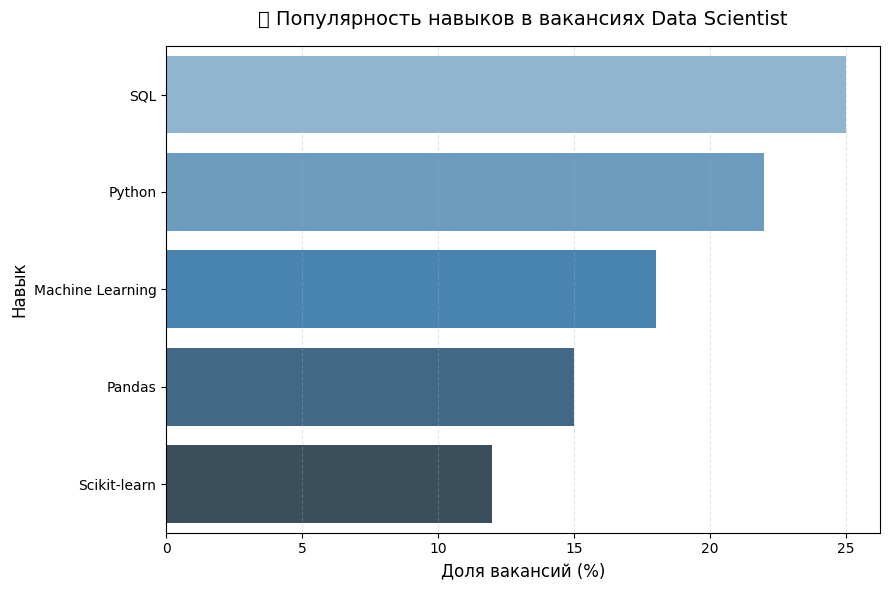

In [105]:

skills_data = pd.DataFrame({
    'Навык': ['SQL', 'Python', 'Machine Learning', 'Pandas', 'Scikit-learn'],
    'Доля вакансий (%)': [25, 22, 18, 15, 12]
})

plt.figure(figsize=(9, 6))
sns.barplot(data=skills_data, x='Доля вакансий (%)', y='Навык', palette='Blues_d')
plt.title('🧠 Популярность навыков в вакансиях Data Scientist', fontsize=14, pad=15)
plt.xlabel('Доля вакансий (%)', fontsize=12)
plt.ylabel('Навык', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

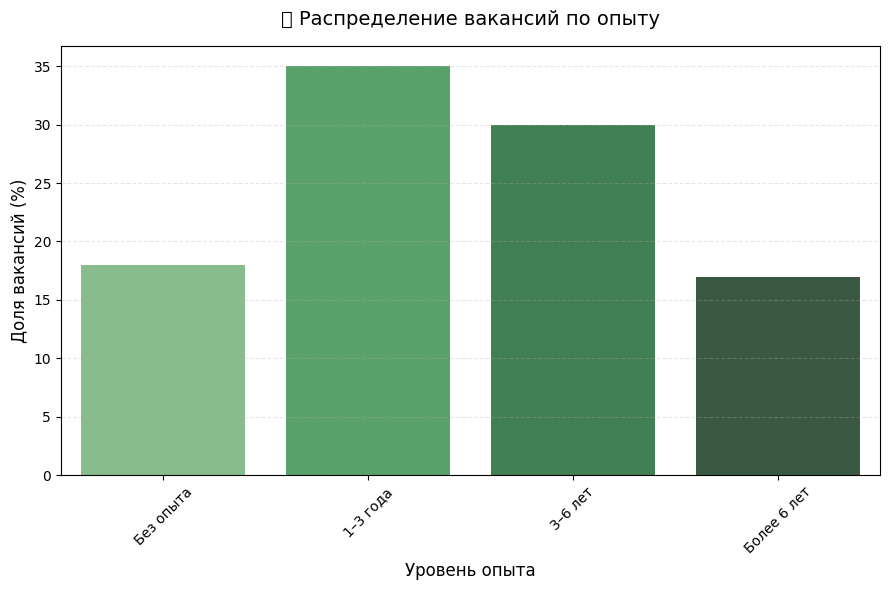

In [106]:
experience_data = pd.DataFrame({
    'Уровень опыта': ['Без опыта', '1–3 года', '3–6 лет', 'Более 6 лет'],
    'Доля вакансий (%)': [18, 35, 30, 17]
})

plt.figure(figsize=(9, 6))
sns.barplot(data=experience_data, x='Уровень опыта', y='Доля вакансий (%)', palette='Greens_d')
plt.title('📈 Распределение вакансий по опыту', fontsize=14, pad=15)
plt.xlabel('Уровень опыта', fontsize=12)
plt.ylabel('Доля вакансий (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

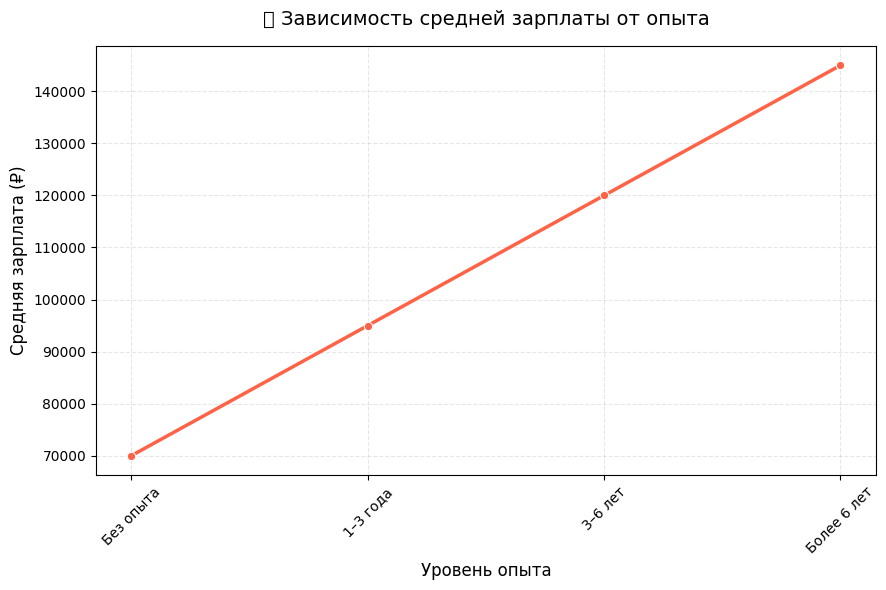

In [107]:

salary_data = pd.DataFrame({
    'Уровень опыта': ['Без опыта', '1–3 года', '3–6 лет', 'Более 6 лет'],
    'Средняя зарплата (₽)': [70000, 95000, 120000, 145000]
})

plt.figure(figsize=(9, 6))
sns.lineplot(data=salary_data, x='Уровень опыта', y='Средняя зарплата (₽)', marker='o', color='tomato', linewidth=2.5)
plt.title('💰 Зависимость средней зарплаты от опыта', fontsize=14, pad=15)
plt.xlabel('Уровень опыта', fontsize=12)
plt.ylabel('Средняя зарплата (₽)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [108]:
# SQL-запрос для подсчёта средней зарплаты по опыту в НЕ-DS/ML вакансиях
# Используется NOT IN с подзапросом для исключения вакансий по ключевым словам
query_7_1 = f'''
    SELECT 
        experience AS experience_level,
        ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary_non_ds
    FROM VACANCIES
    WHERE experience IS NOT NULL AND TRIM(experience) <> ''  -- Фильтр на заполненность опыта
    AND id NOT IN (
        SELECT id
        FROM VACANCIES
        WHERE 
            name ILIKE '%data scientist%' OR
            name ILIKE '%data science%' OR
            name ILIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
            name ILIKE '%machine learning%' OR
            name ILIKE '%машинн%обучен%'
    )
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)  -- Только вакансии с указанием зарплаты
    GROUP BY experience_level
    ORDER BY avg_salary_non_ds DESC;
'''

In [109]:
try:
    result_df = pd.read_sql_query(query_7_1, connection)

    if not result_df.empty:
        print("Средняя зарплата по опыту в НЕ-DS/ML вакансиях:")
        display(result_df)
    else:
        print("Ошибка: Результат запроса пустой.")
except Exception as e:
    print(f"Произошла ошибка при выполнении запроса: {e}")

Средняя зарплата по опыту в НЕ-DS/ML вакансиях:


,experience_level,avg_salary_non_ds
0,Более 6 лет,166256.0
1,От 3 до 6 лет,132683.0
2,От 1 года до 3 лет,76403.0
3,Нет опыта,40425.0


In [110]:
# не забываем закрыть соединение после окончания работы
connection.close()